# Explore forum posts
How many words per post, how many posts per author, that sort of thing.  Intended to help inform the design of our first authorship attribution models.  Note that we are including only posts with at least some text (_selftext_) and ignoring posts that are just an image/url.

In [49]:
import json
lines = open('../data/RS_2011-01', "r").readlines()
posts = []

i = 0
while len(posts) < 100000 and i < len(lines):
    try:
        i = i + 1
        p = json.loads(lines[i-1].rstrip())
        
        # Keep only posts with at least some text
        if len(p['selftext']) == 0:
            continue
            
        posts.append(p)
    except:
        continue
        
print("Loaded " + str(len(posts)))
print("Sample post:")
posts[9]['selftext']

Loaded 100000
Sample post:


"I'd rather not download a torrent if at all possible. I've been looking on LetMeWatchThis.com, ch131.com, and alluc.org for months now. Nobody seems to have it. \n\nThanks if you can help."

In [50]:
posts[9].keys()

dict_keys(['downs', 'link_flair_text', 'distinguished', 'media', 'url', 'link_flair_css_class', 'id', 'edited', 'num_reports', 'created_utc', 'banned_by', 'name', 'subreddit', 'title', 'author_flair_text', 'is_self', 'author', 'media_embed', 'permalink', 'author_flair_css_class', 'selftext', 'domain', 'num_comments', 'likes', 'clicked', 'thumbnail', 'saved', 'subreddit_id', 'ups', 'approved_by', 'score', 'selftext_html', 'created', 'hidden', 'over_18'])

## Words per post?
This might affect our opinions about the size of the sequences we need to work with.

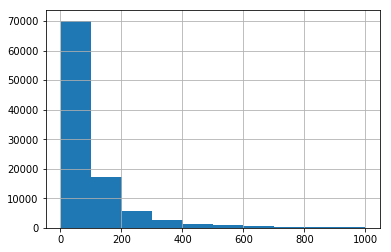

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

counts = []
for p in posts:
    counts.append(len(p['selftext'].split(" ")))
    
df = pd.DataFrame({"counts": counts})
df['counts'][df['counts'] < 1000].hist()

## How prolific?
How many posts from the typical author?

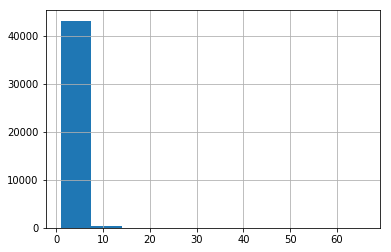

In [52]:
author_counts = dict()
for p in posts:
    if 'author' not in p:
        continue
        
    if p['author'] == '[deleted]':
        continue
        
    if p['author'] not in author_counts:
        author_counts[p['author']] = 1
    else:
        author_counts[p['author']] = author_counts[p['author']] + 1
        
df_authors = pd.DataFrame({'author': list(author_counts.keys()), 'posts': list(author_counts.values())})
df_authors.posts.hist()

In [53]:
df_authors = df_authors.sort_values(by=['posts'])
df_authors.tail()

,author,posts
940,SwirlStick,40
16269,rowanman281,43
1701,brphollis1,53
2143,rmm45177,64
623,Moregunsthanpatience,66


### And what do their posts look like?
Let's take a per-author look...

In [57]:
target_author = "SwirlStick"
samples = []
for p in posts:
    if 'author' not in p:
        continue
    
    if p['author'] == target_author:
        samples.append(p['selftext'])
    
samples

['Did your mom (bless her heart) just not know how to even boil water, but you had to eat her cooking? Does your wife burn everything? What sort of dishes did they make? What was the worst? Did they think they were any good?',
 "This happens to me a lot. With video games, cartoons, comics, etc. I always remember how awesome they were but then when I try to watch, play, read them again they're kind of lame. Do you have something like this? A food that you enjoyed back then but can't stomach (Kraft mac &amp; cheese with cut up Oscar Meyer hot dogs). A video game (some of the old SNES games), TV shows? Books? Movies? Toys?",
 'What was it? Do you still use it? Have you bought any others for gifts?',
 "I love watching Antiques Roadshow, Pawn Stars, American Picker, Hardcore Pawn, etc. It's always amazing to see what people have sitting in their attics that turns out to be worth a crap load. But it's also as entertaining to see the blokes who think they have something of value and it turns 